# Algoritmos de optimización - Reto 2

Nombre: Pedro Luis Soto Santos <br>
Github: https://github.com/plss12/03MAIR---Algoritmos-de-Optimizacion/blob/main/Reto%202/Algoritmos_R2.ipynb<br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

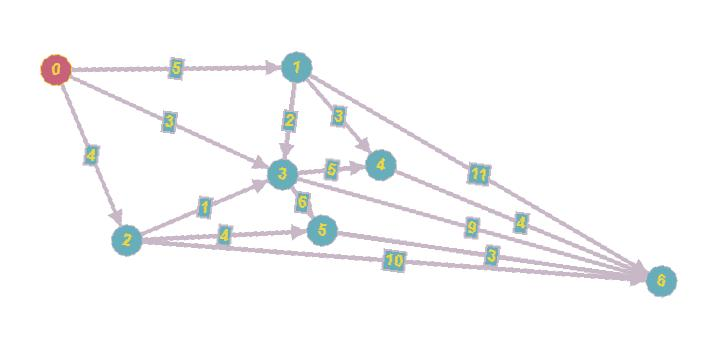

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [8]:
#Viaje por el rio - Programación dinámica

import math

def ruta_coste_min(costes):
    n = len(costes)

    # Creamos una lista donde guardaremos los costes mínimos
    # de llegar al nodo i desde el nodo 0
    res = [math.inf] * n
    res[0] = 0
    
    # Creamos una lista para almacenar la ruta óptima hasta cada nodo
    ruta_optima = [[] for _ in range(n)]
    ruta_optima[0].append(0)

    # Iteramos sobre todos los nodos
    for i in range(1, n):
        # Para cada nodo iteramos sobre todos los nodos anteriores
        for j in range(i):
            # Comprobamos si hay camino entre j e i
            if costes[j][i] != math.inf:
                # Elegimos el camino de coste mínimo
                if res[i] > res[j] + costes[j][i]:
                    # Actualizamos el coste mínimo
                    res[i] = res[j] + costes[j][i]
                    # Actualizamos la ruta óptima
                    ruta_optima[i] = ruta_optima[j] + [i]

    # Si existe devolvemos el coste mínimo y la ruta de llegar al nodo n desde el nodo 0
    # Si no existe devolvemos -1
    return (res[n-1], ruta_optima[n-1]) if res[n-1] != math.inf else (-1, -1)

In [10]:
costes = [[math.inf, 5, 4, 3, math.inf, math.inf, math.inf],
          [math.inf, math.inf, math.inf, 2, 3, math.inf, 11],
          [math.inf, math.inf, math.inf, 1, math.inf, 4, 10],
          [math.inf, math.inf, math.inf, math.inf, 5, 6, 9],
          [math.inf, math.inf, math.inf, math.inf, math.inf, math.inf, 4],
          [math.inf, math.inf, math.inf, math.inf, math.inf, math.inf, 3],
          [math.inf, math.inf, math.inf, math.inf, math.inf, math.inf, math.inf]]

coste_minimo, ruta_minima = ruta_coste_min(costes)
print("Coste mínimo:", coste_minimo)
print("Ruta mínima:", ruta_minima)

Coste mínimo: 11
Ruta mínima: [0, 2, 5, 6]


In [12]:
costes = [[math.inf, 2, 4, math.inf, math.inf],
                  [math.inf, math.inf, 1, 4, math.inf],
                  [math.inf, math.inf, math.inf, 2, 5],
                  [math.inf, math.inf, math.inf, math.inf, 1],
                  [math.inf, math.inf, math.inf, math.inf, math.inf]]

coste_minimo, ruta_minima = ruta_coste_min(costes)
print("Coste mínimo:", coste_minimo)
print("Ruta mínima:", ruta_minima)

Coste mínimo: 6
Ruta mínima: [0, 1, 2, 3, 4]


## Descenso del gradiente

In [13]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [233]:
#Definimos la funcion
#Paraboloide
f  = lambda X: X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0], 2*X[1]]    #Gradiente

df([1,2])

[2, 4]

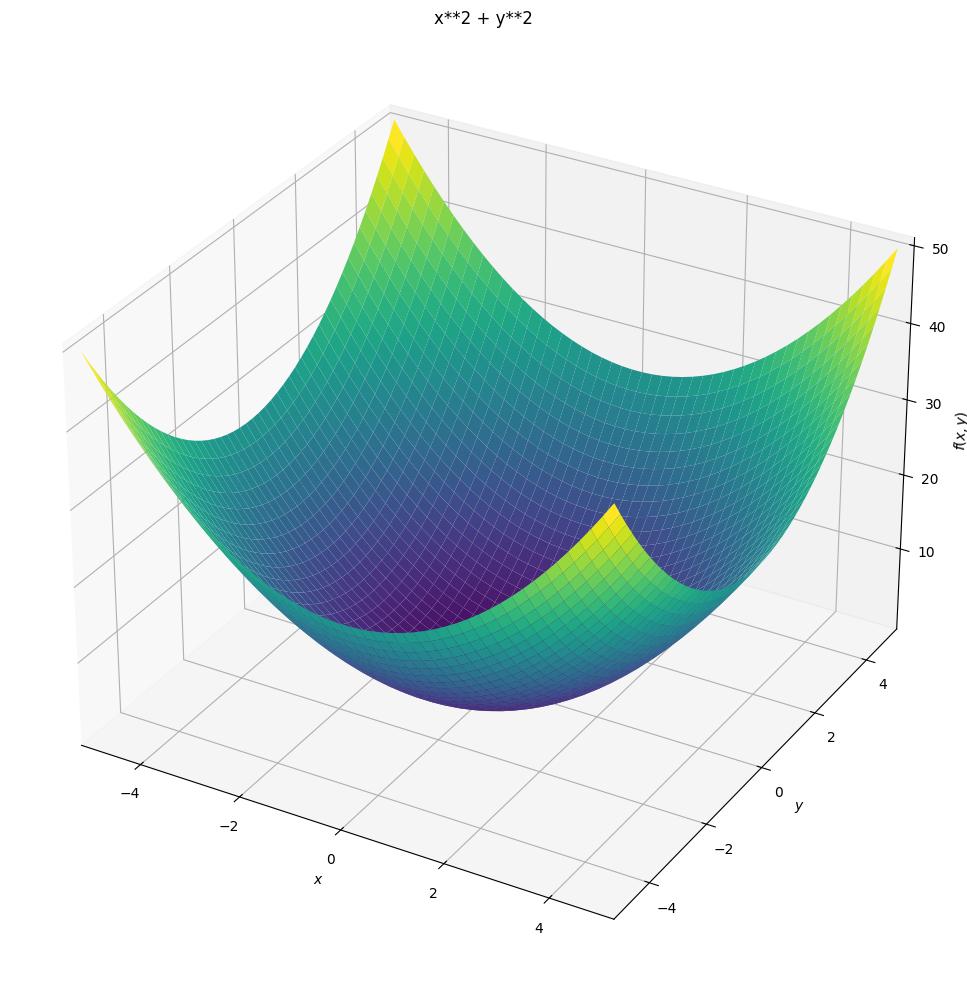

In [76]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d

x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

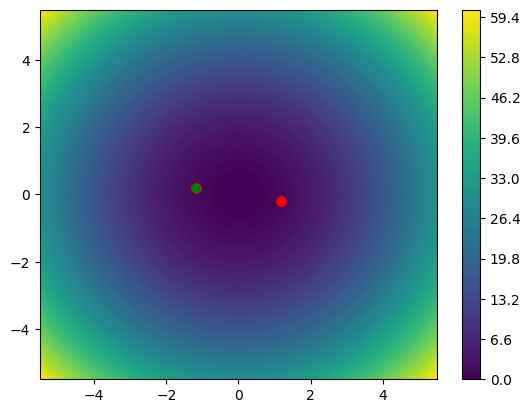

Solucion: [-1.1679151481449104, 0.19085702883194777] 1.4004521987209069


In [260]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango = 5.5

X = np.linspace(-rango,rango,resolucion)
Y = np.linspace(-rango,rango,resolucion)
Z = np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P = [random.uniform(-5,5),random.uniform(-5,5)]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA = 1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:", P, f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
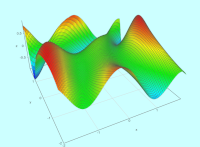


In [265]:
#Definimos la funcion
import math
f = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]))

# Gradiente de la función
df = lambda X: [
    -2*np.sin(1/2*X[0]**2 - 1/4*X[1]**2 + 3)*np.sin(2*X[0] + 1 - np.exp(X[1])) + X[0]*np.cos(2*X[0] + 1 - np.exp(X[1]))*np.cos(1/2*X[0]**2 - 1/4*X[1]**2 + 3),
    np.exp(X[1])*np.sin(1/2*X[0]**2 - 1/4*X[1]**2 + 3)*np.sin(2*X[0] + 1 - np.exp(X[1])) - 1/2*X[1]*np.cos(2*X[0] + 1 - np.exp(X[1]))*np.cos(1/2*X[0]**2 - 1/4*X[1]**2 + 3)]

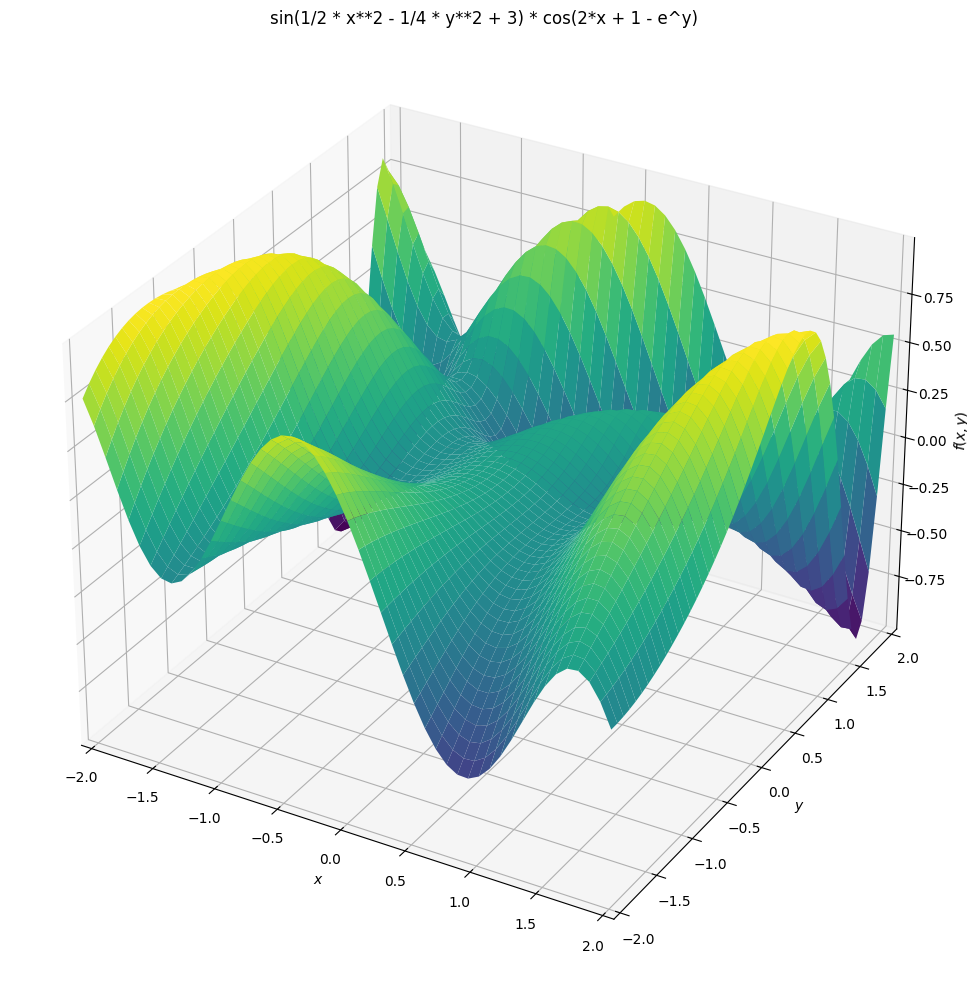

In [274]:
from sympy import symbols, sin, cos, exp
x,y = symbols('x y')
fun = sin(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2*x + 1 - exp(y))

plot3d(fun,(x,-2,2),(y,-2,2),
       title='sin(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2*x + 1 - e^y)',
       size=(10,10))

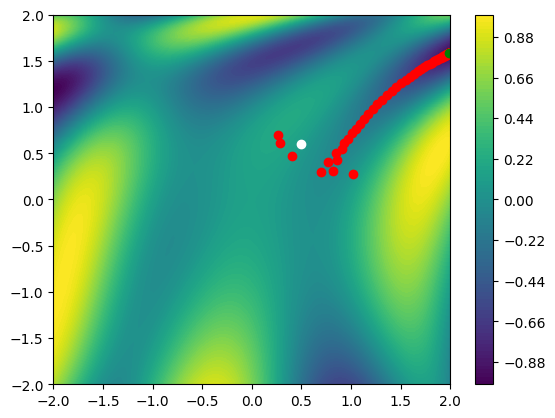

Solucion: [1.9929222950271714, 1.5833966075642174] -0.9321044807172353


In [304]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango = 2

X = np.linspace(-rango,rango,resolucion)
Y = np.linspace(-rango,rango,resolucion)
Z = np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P = [random.uniform(-rango,rango),random.uniform(-rango,rango)]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje.
TA = 1

#Iteraciones:1000
for _ in range(1000):
  grad = df(P)
  P[0],P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")
  # Reducimos la tasa de aprendizaje en cada iteración
  TA = TA * 0.9

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:", P, f(P))